# AdiPitch
Pitch extraction notebook algorithm for Python

### Chapters 1 & 2 Based on this Guide:
https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/
### Chapter 3 & 4 written by Adriel Isaiah V. Amoguis
#### CONTENTS:
Chapter 1: Generating a Tone and Saving it to a File<br>
Chapter 2: Loading a Wave from a File and Calculating Its Frequency<br>
Chapter 3: Extracting the Exact Frequencies From a Segmented Wave<br>
Chapter 4: Notes & Documentation

In [1]:
# Library Imports
import numpy as np
import wave
import struct
from matplotlib import pyplot as plt
import random as rand

To make frequency categorization a lot easier, let us classify them into arrays. For the application of our audio-cryptosystem, we shall be using the pitches B2 - C5, a total of 26 keys, which corresponds to the 26 letters in the alphabet.<br>
<br>
Since I'm lazy to list out all the pitch values from C0 to C8, I just listed all their values from octave zero and using theories in harmony of frequencies, generate the rest up the keyboard.

In [141]:
# Declare & Initialize the Arrays - Use prefix 'f' to denote that it contains a list of frequencies
fB = [30.87, 61.74, 123.47, 246.94, 493.88, 987.77, 1975.53, 3951.07]
fC = [16.35, 32.70, 65.41, 130.81, 261.63, 523.25, 1046.50, 2093.00]
fDb = [17.32, 34.65, 69.30, 138.59, 277.18, 554.37, 1108.73, 2217.46]
fD = [18.35, 36.71, 73.42, 146.83, 293.66, 587.33, 1174.66, 2349.32]
fEb = [19.45, 38.89, 77.48, 155.56, 311.13, 622.25, 1244.51, 2489.02]
fE = [20.60, 41.20, 82.41, 164.81, 329.63, 659.25, 1318.51, 2637.02]
fF = [21.83, 43.65, 83.31, 174.61, 349.23, 698.46, 1396.91, 2793.83]
fGb = [23.12, 46.25, 92.50, 185.00, 369.99, 739.99, 1479.98, 2959.96]
fG = [24.50, 49.00, 98.00, 196.00, 392.00, 783.99, 1567.98, 3135.96]
fAb = [25.96, 51.91, 103.83, 207.65, 415.30, 830.61, 1661.22, 3322.44]
fA = [27.50, 55.00, 110.00, 220.00, 440.00, 880.00, 1760.00, 3520.00]
fBb = [29.14, 58.27, 116.54, 233.08, 466.16, 932.33, 1864.66, 3729.31]

## Chapter 1: Generating a Tone

The following are macros to use for processing:<br>
<br>
FREQUENCY = frequency.<br>
nSAMPLES = number of samples to take per second (from analog audio signals)<br>
SAMPLERATE = HQ (48kHz)<br>
AMPLITUDE = height of the wave on the y-axis. Represents the volume of the wave.

In [3]:
# Set some constants
FREQUENCY = 1000
nSAMPLES = 48000
SAMPLERATE = 48000.0
AMPLITUDE = 16000

# For testing purposes:
file = "test.wav"

For this GEMATMW project, I decided to use a sine wave. But why not Cosine?<br>
-> Because the guide I'm following uses a sine wave. Simple as that.<br>
<br>
Prepare the Sine Wave:

In [4]:
# y(t) = A * sin(2 * pi * f * t)
"""
    So for this particular sine wave, we are creating nSAMPLES amount of samples. In other words,
    we are evaluating the sine function nSAMPLES number of times.
"""
sineWave = [np.sin(2 * np.pi * FREQUENCY * x/SAMPLERATE) for x in range(nSAMPLES)]

Write the sine wave to an audio file:

In [5]:
# Constants for file writing
nFrames = nSAMPLES
compressionType = "NONE"
compressionName = "not compressed"
nCHANNELS = 1
SAMPWIDTH = 2

In [6]:
# Get user input for filename to write
print("Filename to write for audio file:")
file = str(input())

Filename to write for audio file:
testaudiosss.wav


In [7]:
# Create the file
wavFile = wave.open(file, 'w')
wavFile.setparams((nCHANNELS, SAMPWIDTH, int(SAMPLERATE), nFrames, compressionType, compressionName))

In [8]:
# The tedious part: For every single element present in the sine wave (which is continuous),
# write the sine function frames unto the file buffer.
for e in sineWave:
    wavFile.writeframes(struct.pack('h', int(e*AMPLITUDE)))
# Multiplying by the amplitude to spread out the y-values
# This can also be done by multiplying it to the actual sine function. But apparently, the guide says
# this is a better application, in order to create a fixed point.

# Using the struct library, we're packing the integer data into a hexadecimal for binary writing.

# Close the file:
wavFile.close()

## Chapter 2: Calculating the Frequency of a Sine Wave
It is in this part that we get what we came for -- the frequency of the sine audio wave, which we can use for the audio-cryptosystem.

In [146]:
# Get user input for filename to write
print("Filename to read for audio file:")
file = str(input())
#D:\Projects\Coding\Python\AUDIO PROCESSING\AdiPitch\\testAudio.wav

Filename to read for audio file:
D:\Projects\Coding\Python\AUDIO PROCESSING\AdiPitch\\testAudioCC.wav


In [157]:
# Open the file
wavFile = wave.open(file, 'r')
audioData = wavFile.readframes(nSAMPLES)
wavFile.close()

In [158]:
# Unpack the data from binary (hex) to integers
audioData = struct.unpack('{n}h'.format(n=nSAMPLES), audioData)
# Convert the data into a numpy array
arrData = np.array(audioData)
# Get FFT from the data
dataFFT = np.fft.fft(arrData)

In [159]:
# Convert the complex numbers into numbers we can ACTUALLY USE
arrFreq = np.abs(dataFFT)

In [160]:
# Print the dominant frequency
print("Dominant Frequency: " + str(np.argmax(arrFreq)) + "Hz")

Dominant Frequency: 233Hz


Plot the frequencies found:

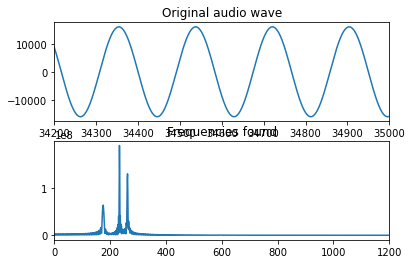

In [161]:
plt.subplot(211)
plt.plot(arrData)
plt.title("Original audio wave")
plt.xlim(34200,35000)
plt.subplot(2,1,2)
plt.plot(arrFreq)
plt.title("Frequencies found")
plt.xlim(0,1200)
plt.show()

## Chapter 3: Moving Away from the Guide - Extracting the Frequencies Needed

When reading the audio data, the guide provides us with four different variables we can work with. Namely:<br>
    1. audioData - Contains the raw integer array from the data (might not use this)<br>
    2. arrData - Raw integers from audioData in a numpy data. The sine wave itself.<br>
    3. dataFFT - Contains the integers from the data in a numpy array, but values are complex values.<br>
    4. arrFreq - The array that actually contains the frequencies.<br>

#### TASK: We have to find the peaks in the audio data with respect to the time they were sampled
We shall continue from the already opened audio file in chapter 2.

### ALGORITHM:
1. The data will be segmented based on number of tones as provided by user input key.
2. To get the frequency, we count the instances of the wave passing through the x-axis.<br>

In [162]:
discont = []
print("Input key:")
nTones = int(input())
factor = nSAMPLES // nTones
discont.append(factor)
for i in range(1,nTones-1):
    discont.append(discont[i-1]+factor)
discont.append(48000)
print(discont)

Input key:
6
[8000, 16000, 24000, 32000, 40000, 48000]


In [163]:
# Search for discontinuities present in the wave [OBSOLETE]
"""discont = []
threshold = 1200 # <---- FIND AN OPTIMAL VALUE FOR THE THRESHOLD
for i in range(nSAMPLES-1):
    # Get difference
    diff = arrData[i+1] - arrData[i]
    if abs(diff) > threshold:
        discont.append(i)
# Append the last element
discont.append(48000)
print(discont)"""

'discont = []\nthreshold = 1200 # <---- FIND AN OPTIMAL VALUE FOR THE THRESHOLD\nfor i in range(nSAMPLES-1):\n    # Get difference\n    diff = arrData[i+1] - arrData[i]\n    if abs(diff) > threshold:\n        discont.append(i)\n# Append the last element\ndiscont.append(48000)\nprint(discont)'

In [164]:
# We slice arrFreq according to segments
segmentList = []
start = 0
end = discont[0]
for i in range(0, len(discont)):
    end = discont[i]
    print("Start = " + str(start) + "\nEnd = " + str(end))
    segmentList.append(arrData[start:end])
    temp = end + 1
    start = temp
#print(segmentList)

Start = 0
End = 8000
Start = 8001
End = 16000
Start = 16001
End = 24000
Start = 24001
End = 32000
Start = 32001
End = 40000
Start = 40001
End = 48000


### Find sign changes. These are counted as x-axis passes. 
We shall use the frequency ratio I derived below:<br>
#### FREQUENCY = (48000*C) / B
where, <br>
f = frequency<br>
C = number of x-axis passes divided by 2<br>
B = sample number of the last sample with the x-axis pass

Detect sign changes in the "arrData" array after segmentation based on the discontinuities found in the previous cell.

In [168]:
# Find sign changes
segmentFreq = []
for i in range(len(segmentList)):
    nIntersect = 0
    for j in range(len(segmentList[i])-1):
        #print(str(segmentList[i][j]) + " && " + str(segmentList[i][j+1]))
        if segmentList[i][j] == 0 and segmentList[i][j+1] > 0:
            nIntersect += 1
        elif segmentList[i][j] == 0 and segmentList[i][j+1] < 0:
            nIntersect += 1
        elif segmentList[i][j] < 0 and segmentList[i][j+1] > 0:
            nIntersect += 1
        elif segmentList[i][j] > 0 and segmentList[i][j+1] < 0:
            nIntersect += 1
    # Calculate the frequency using the formula
    #print(nIntersect)
    segmentFreq.append((48000 * (nIntersect/2))/j)
print(segmentFreq)

[234.05851462865718, 234.08778291859448, 234.08778291859448, 261.09791171689386, 264.0990371389271, 174.06527447792922]


It works! We finally have our frequencies. We shall now do further cleaning to get the frequency itself, given a tolerance threshold.

In [170]:
threshold = 5 # cents
finalFrequencies = []
for i in segmentFreq:
    found = 0
    print(i)
    for j in range(len(fA)):
        if i >= fA[j]-threshold and i <= fA[j]+threshold and not found:
            print("Freq = " + str(i) + " Bounds = " + str(fA[j]-threshold) + " and " + str(fA[j]+threshold))
            finalFrequencies.append("A" + str(j))
            found = 1
        elif i >= fBb[j]-threshold and i <= fBb[j]+threshold and not found:
            found = 1
            finalFrequencies.append("Bb" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fBb[j]-threshold) + " and " + str(fBb[j]+threshold))
        elif i >= fB[j]-threshold and i <= fB[j]+threshold and not found:
            finalFrequencies.append("B" + str(j))
            found = 1
            print("Freq = " + str(i) + " Bounds = " + str(fB[j]-threshold) + " and " + str(fB[j]+threshold))
        elif i >= fC[j]-threshold and i <= fC[j]+threshold and not found:
            found = 1
            finalFrequencies.append("C" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fC[j]-threshold) + " and " + str(fC[j]+threshold))
        elif i >= fDb[j]-threshold and i <= fDb[j]+threshold and not found:
            found = 1
            finalFrequencies.append("Db" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fDb[j]-threshold) + " and " + str(fDb[j]+threshold))
        elif i >= fD[j]-threshold and i <= fD[j]+threshold and not found:
            found = 1
            finalFrequencies.append("D" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fD[j]-threshold) + " and " + str(fD[j]+threshold))
        elif i >= fEb[j]-threshold and i <= fEb[j]+threshold and not found:
            found = 1
            finalFrequencies.append("Eb" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fEb[j]-threshold) + " and " + str(fEb[j]+threshold))
        elif i >= fE[j]-threshold and i <= fE[j]+threshold and not found:
            found = 1
            finalFrequencies.append("E" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fE[j]-threshold) + " and " + str(fE[j]+threshold))
        elif i >= fF[j]-threshold and i <= fF[j]+threshold and not found:
            found = 1
            finalFrequencies.append("F" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fF[j]-threshold) + " and " + str(fF[j]+threshold))
        elif i >= fGb[j]-threshold and i <= fGb[j]+threshold and not found:
            found = 1
            finalFrequencies.append("Gb" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fGb[j]-threshold) + " and " + str(fGb[j]+threshold))
        elif i >= fG[j]-threshold and i <= fG[j]+threshold and not found:
            found = 1
            finalFrequencies.append("G" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fG[j]-threshold) + " and " + str(fG[j]+threshold))
        elif i >= fAb[j]-threshold and i <= fAb[j]+threshold and not found:
            found = 1
            finalFrequencies.append("Ab" + str(j))
            print("Freq = " + str(i) + " Bounds = " + str(fAb[j]-threshold) + " and " + str(fAb[j]+threshold))
    if not found:
        finalFrequencies.append("???")
print(finalFrequencies)

234.05851462865718
Freq = 234.05851462865718 Bounds = 228.08 and 238.08
234.08778291859448
Freq = 234.08778291859448 Bounds = 228.08 and 238.08
234.08778291859448
Freq = 234.08778291859448 Bounds = 228.08 and 238.08
261.09791171689386
Freq = 261.09791171689386 Bounds = 256.63 and 266.63
264.0990371389271
Freq = 264.0990371389271 Bounds = 256.63 and 266.63
174.06527447792922
Freq = 174.06527447792922 Bounds = 169.61 and 179.61
['Bb3', 'Bb3', 'Bb3', 'C4', 'C4', 'F3']


### Success!
We have found the corresponding frequencies from the fragmented audio file.

## Chapter 4: Algorithm Summary, Notes, & Documentation

### Tone Generation
Tone generation using this system is simple. We're simply generating tones given a frequency. The question, however, is how do we generate multiple tones within the same 48,000 samples? The simple answer to that is providing domain restrictions to each tone, similar to how one would generate a piecewise function. An example of this implementation is found in the final implementation of the GEMATMW cryptosystem that I developed.<br>
### File Formatting, Writing, & Reading
In order to write the 48,000 data points to a file, we write it specifically to the format of a WAVE file (.wav file extension). Additionally, in order for this wave to be read by media players, it has to be saved in binary format using hexadecimal values (base 16 integers). The way Python saves this is using the struct library, specifically, the pack and unpack functions. This library is strict in terms of buffer size. If the buffer size is lesser than the size of 96,000 bytes (for this implementation), it causes an exception, which may happen if the audio file lacked some bytes. The GEMATMW cryptosystem implementation for this is programmed in such a way that it will avoid every single possibility of this happening, though I cannot guarantee yet as of now.<br>
### Calculating For the Frequency
I will no longer explain the algorithm used in Chapter 2, since it is not my own code. I will only explain from where we left off from chapter 2 and go into chapter 3.<br>
After reading the file and storing all sine data points into an array "arrData" which was done in Chapter 2 (code is not mine), we start chapter 3 by segmenting this array into *n* number of segments, where *n* is an integer that simply denotes the number of different frequencies stored in that one wave file.<br>
After evenly splitting the whole array of data into different segments (*y* values of the sine function with respect to time *x*), we shall begin counting the number of times the sine wave (done by segment) passes through the x-axis. In this implementation, that was done by checking if there are any sign changes for any two data points. If a sign change was found, that indicates that the y-value passed through the x-axis. We shall call this number of instances as *C*. We also record the last data point in the segment with the variable *B*. Following the definition of the sine function (http://digitalsoundandmusic.com/2-1-2-properties-of-sine-waves/), I derived the following ratio for this implementation:

<strong>FREQUENCY = (48000*C) / B</strong><br>
where,<br>
f = frequency<br>
C = number of x-axis passes divided by 2<br>
B = sample number of the last sample with the x-axis pass<br>
<br>
This was derived with the assumptions that:<br>
A. The maximum amplitude *A* for this implementation will always be 16kHz.<br>
B. The number of samples/data points for this implementation will always be 48,000.<br>
C. The sample rate for this implementation will always be 48kHz/second (this is why audio files for this implementation is only limited to a duration of 1 second).<br>
<br>
The ratio was developed using the follwing logic:<br>
Actual Frequency (Number of Sine Cycles) : 48,000 :: Segment Frequency (Segment # of Sine Cycles) : Last Sample Number for the Segment (*B*)<br>
Therefore, segment frequency is found.<br>
### Classifying Frequencies to Pitch Names
In cell no. 2 of this Jupyter Notebook, I defined the different frequencies of musical concert pitches and stored them in an array based on pitch name. As an example:<br>
<br>
Concert A4 is stored as fA[4], where f is just an array prefix just to tell me that it contains frequencies (see: Programming in Hungrarian Notation)<br>
Similarly, the pitch Concert F5 is stored as fF[5].<br>
<br>
<strong>NOTE:</strong> I defined pitches from octave 0 to octave 7 only.<br>
Pitch list uses flats instead of sharps. C# == Db<br>
<br>
Since we cannot accurately calculate for frequencies on-point, the frequencies we get from this algorithm do have a deviation of about +- 5 on average from the actual frequency value. Because of this, we need to accept a certain threshold of values to be classified into a valid pitch. So, we accept a frequency and classify it as pitch name *X* for example if *x-threshold <= frequency <= x+threshold*.<br>
### Implementation in the GEMATMW Cryptosystem
In the cryptosystem, we generate an audio file with varying tones depending on a user input string (plain text). The audio file will serve as our cipher message, paired with a generated key in base64. For decryption, an audio file and base64 key is fed into the decryptor, checks pitch names, and converts them into the plain text message.

# Appendices
<hr>

## Author's Information
### Adriel Isaiah V. Amoguis
Student in the Bachelor's Course Computer Science with Specialization in Software Technology in De La Salle University - Manila.<br>
### What's GEMATMW?
Just in case the one reading this isn't from De La Salle University, GEMATMW stands for the Commission on Higher Education's subject "Mathematics in the Modern World". This project is in partial fullfilments of the requirements for my GEMATMW subject, doing it for my individual project. Since this is a pretty neat sound processing idea, I will make this Jupyter notebook public, only after I complete my GEMATMW units, just in case making this public breaches any academic honesty policies or something.
<br>
### Project Information
Project Started: March 27, 2020<br>
Project Completed: March 31, 2020<br>
### References Used
Code & Logic for Chapters 1 & 2: https://www.pythonforengineers.com/audio-and-digital-signal-processingdsp-in-python/<br>
More Technical Definition of the Sine Function in Chapter 3: http://digitalsoundandmusic.com/2-1-2-properties-of-sine-waves/<br>
My personal notes on programming logic formulation and trigonometry.

March 31, 2020<br>
===== END OF NOTEBOOK =====